In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv('/content/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv',  low_memory=False)

In [154]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in this data frame')

There are 160861 rows and 36 columns in this data frame


In [84]:
# select data from director 0 and directory 1.
#data_ingest = data[(data.ImageDir==0 )| (data.ImageDir==1)]


# for this exercise, we will work with directory zero for efficiency.
data_ingest = data[(data.ImageDir==0)]

## Select the data which has either  label normal or pneumonia.

In [85]:
# Excluding labels including the 'suboptimal study' label
data_prep = data_ingest[(data_ingest["Labels"].str.contains('pneumonia')) | (data_ingest["Labels"].str.contains('normal'))]
data_prep.head()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,...,10,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
14,14,238285621348398466668514178112618553012_a7k6dv...,0,20171024,238285621348398466668514178112618553012,76478060312810134599679306720116852498,1987.0,F,PA,PA,...,5,301,5498692,sin alter radiolog significacion .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
15,15,152191969602076825998375638267191596461_ck9qkz...,0,20150508,152191969602076825998375638267191596461,211676018114322936525876155155978326212,1958.0,F,POSTEROANTERIOR,PA,...,6,None,4913344,sin hallazg radiolog signific .,Physician,['normal'],[],[['normal']],[],[]
20,20,84289138814897824414670894017743137660_xjsw7k.png,0,20140414,84289138814897824414670894017743137660,132905598244344199302356904572008903408,1997.0,F,POSTEROANTERIOR,PA,...,10,-0.95,4674875,normal .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
23,23,258055173326723517262722952856353517225_hcez67...,0,20150116,258055173326723517262722952856353517225,163995406284018596913093962224045518908,1960.0,M,NaN,L,...,0,435,4841969,no apreci infiltr ni condens pulmonar .,Physician,['normal'],[],[['normal']],[],[]


In [155]:
# check shape of the data
print(f'There are {data_prep.shape[0]} rows and {data_prep.shape[1]} columns in this data frame')

There are 1072 rows and 34 columns in this data frame


In [ ]:
# we do need the following columns to analysis the dataser.
data_prep.drop(['Unnamed: 0', 'ImageDir'], axis = 1, inplace = True)

In [157]:
print(f"The total patient ids are {data_prep['PatientID'].count()}, from those the unique ids are {data_prep['PatientID'].value_counts().shape[0]} ")

The total patient ids are 1072, from those the unique ids are 729 


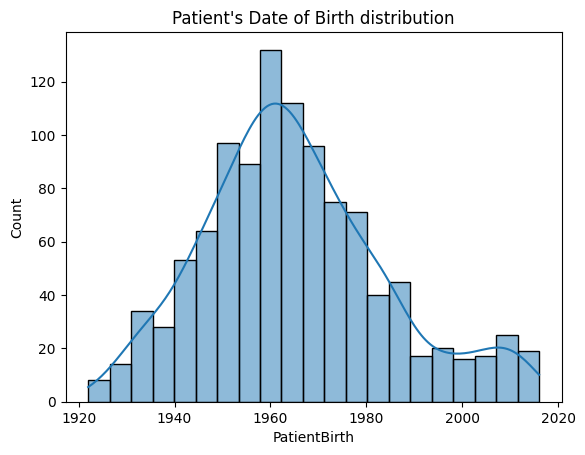

In [121]:
sns.histplot(data_prep['PatientBirth'], kde = True)
plt.title('Patient\'s Date of Birth distribution')
plt.show()

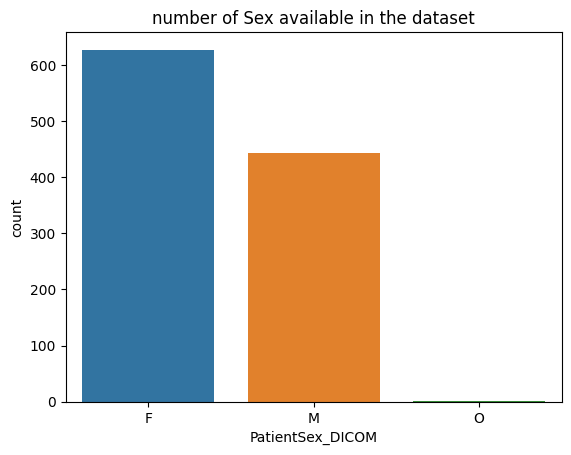

In [108]:
sns.countplot(data = data_prep, x = 'PatientSex_DICOM')
plt.title('number of Sex available in the dataset')
plt.show()

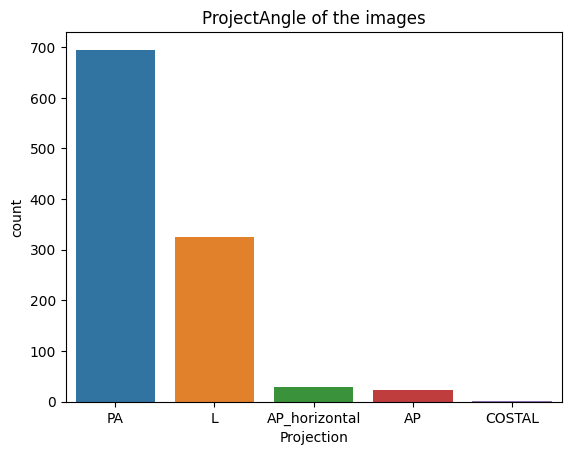

In [110]:

sns.countplot(data = data_prep, x = 'Projection')
plt.title('ProjectAngle of the images')
plt.show()

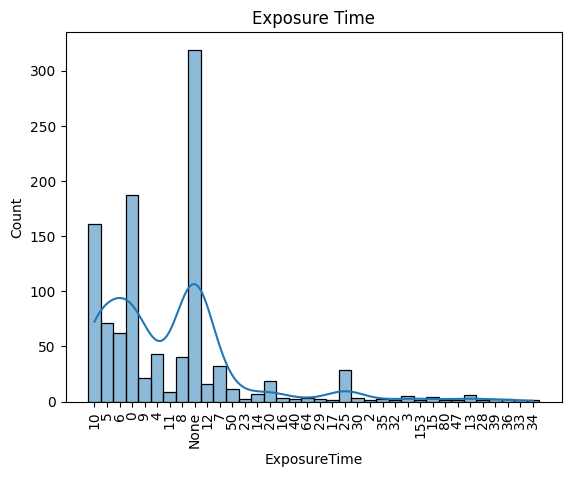

In [113]:

sns.histplot(data_prep['ExposureTime'], kde = True)
plt.xticks(rotation = 90)
plt.title('Exposure Time')
plt.show()

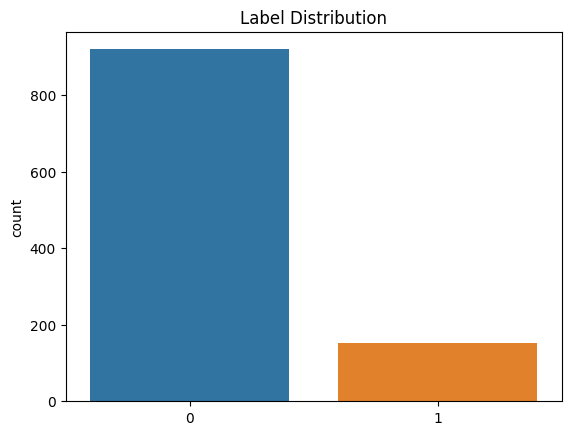

In [153]:
y_label = pd.Series([0 if i == "['normal']" else 1 for i in data_prep['Labels']])
sns.countplot(x= y_label)
plt.title('Label Distribution')
plt.show()

In [159]:
import os

In [179]:

# Extract numpy values from Image column in data frame
images = data_prep['ImageID'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

In [171]:
selected_images = ['32984067162293851477953321590068608041_ajmomz.png',
 '117948971976651446594416064640058242218_ovc55i.png',
 '66542221742995885584652303672522208992_gjjvxg.png',
 '228147380768553292159728012597011580620_8p6by5.png',
 '84073976391871078977269648559238898238_a4r3kc.png',
 '67174718755424410647421129526728544213_ntt5l0.png',
 '216228207147446083228153317485678658271-2_q3plj2.png',
 '278145958936920136774696500785123128624_huslud.png',
 '208622714672496361979101298586098351575_bmbth7.png']

Display Random Images


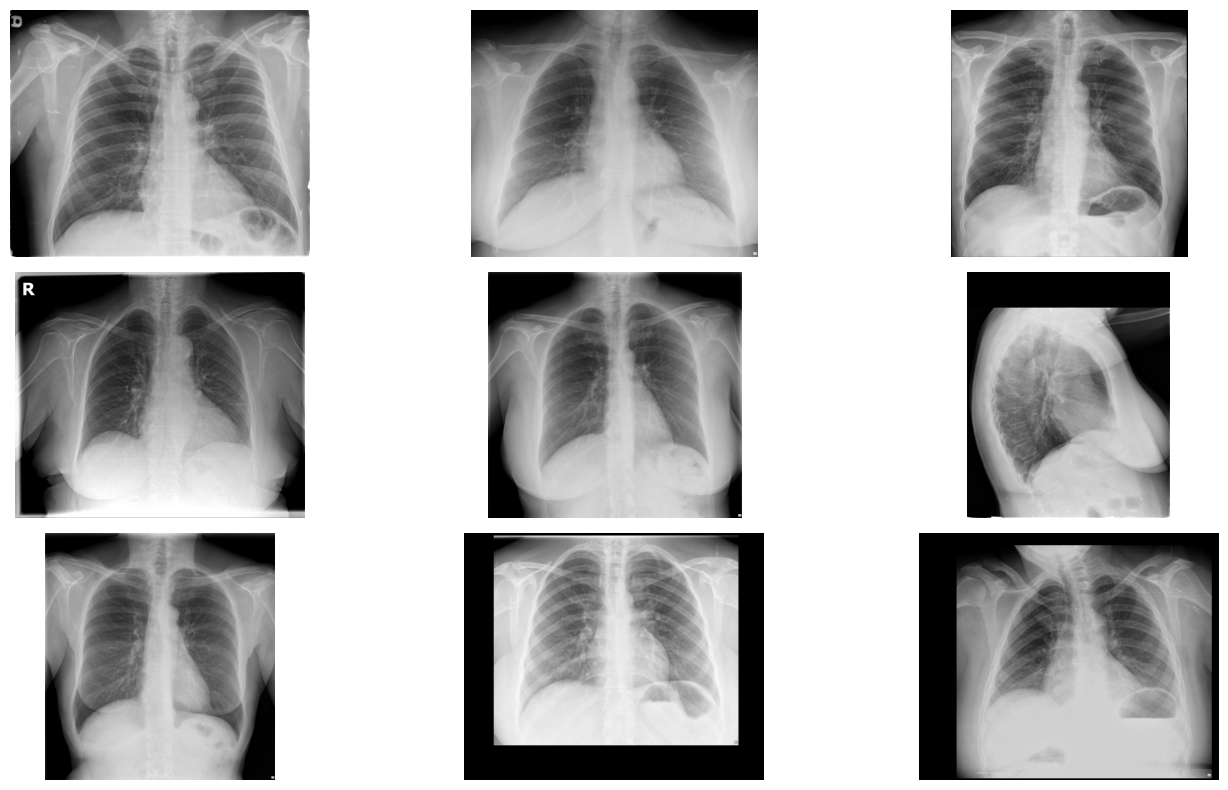

In [170]:
# Location of the image dir
img_dir = ''

print('Display Random Images')
# Adjust the size of your images
plt.figure(figsize=(15,8))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir , random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Adjust subplot parameters to give specified padding
plt.tight_layout()

The dimensions of the image are 2722 pixels width and 2612 pixels height, one single color channel
The maximum pixel value is 0.9739 and the minimum is 0.0000
The mean value of the pixels is 0.5252 and the standard deviation is 0.2149


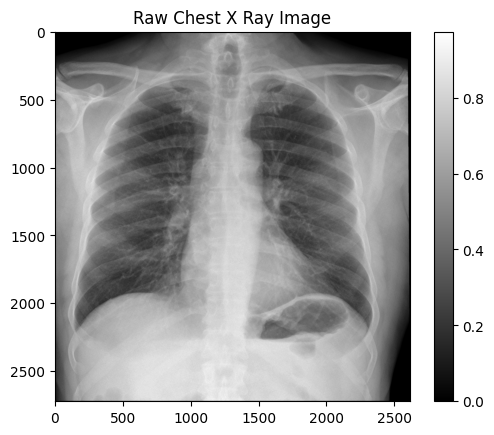

In [172]:
# Get the first image that was listed in the train_df dataframe
raw_image = plt.imread(os.path.join(img_dir, selected_images[2]))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

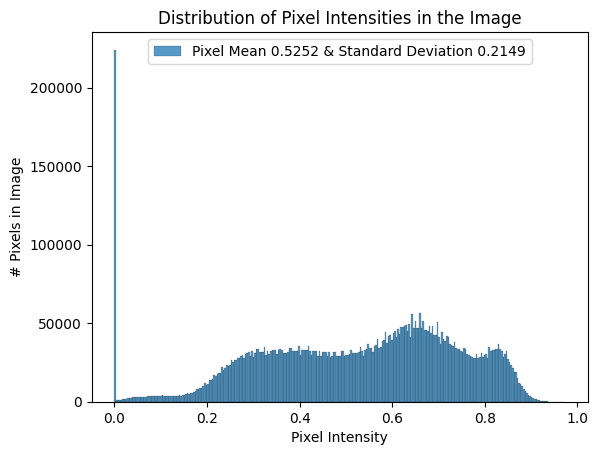

In [180]:
# Plot a histogram of the distribution of the pixels
sns.histplot(raw_image.ravel(),
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}')
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

### Next task is to create the dataset for selected frame. Balance the dataset or create a custome made lose function for imbalance dataset.

- find the images from different directory which has same labels.
- Crate dataset
- split dataset with no patient repitition.